# Build a linear regression model using pandas and python

### Importamos librerias y cargamos el DataSet

In [29]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv("/workspaces/regularized_linear_vicente/data/raw/demographic_health_data.csv")
warnings.filterwarnings("ignore")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [30]:
df.shape

(3140, 108)

## Limpieza del Dataset

Comprobamos que no hay valores null

In [31]:

nulos = df.isnull().sum()

print(nulos[nulos > 0])


Series([], dtype: int64)


Comprobamos que no hay valores únicos

In [32]:
n_unicos = df.nunique()
n_unicos

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


Vistos los datos, no se aprecia que la desviacion estandar de ninguna variable sea 0

Pasamos a comprobar duplicados

In [34]:
duplicadas = df[df.duplicated(keep=False)]

duplicadas

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code


In [35]:
df.duplicated().sum()

np.int64(0)

No existen duplicados

<Axes: >

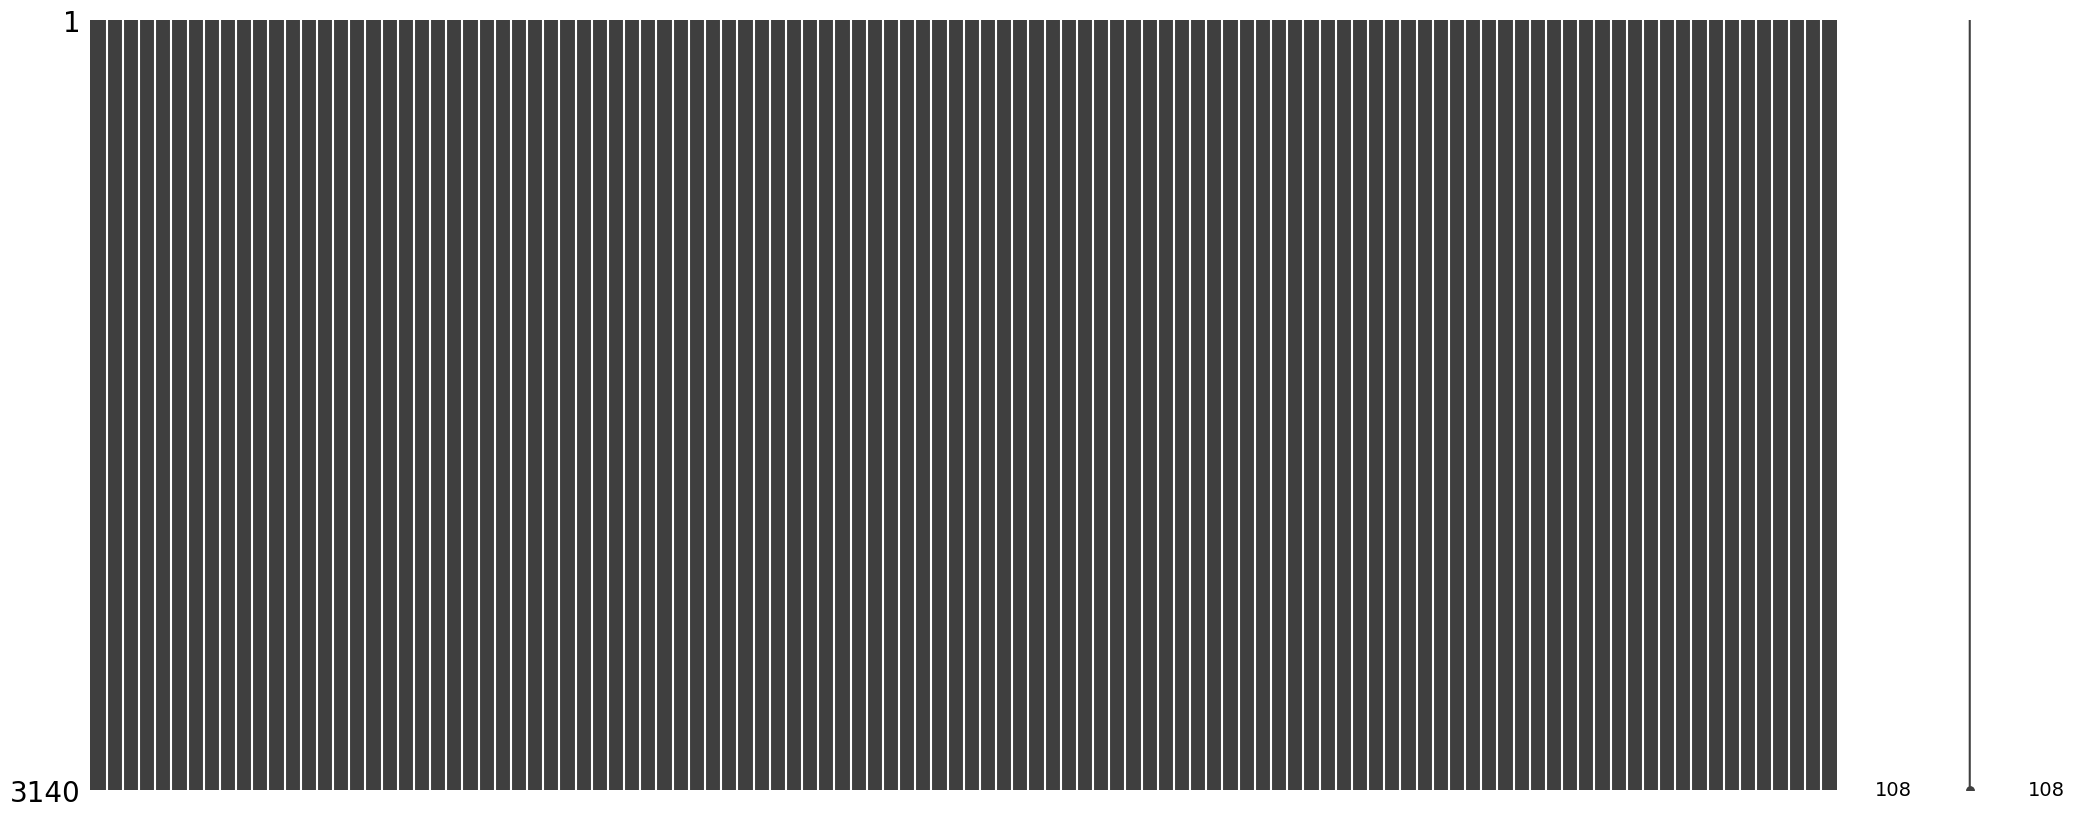

In [36]:
msno.matrix(df)

In [37]:
df.isnull().mean()*100

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

No existen valores faltantes

In [38]:
df.select_dtypes(include=['number'])

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


Tenemos unas 106 columnas numéricas. No vamos a poder hacer un estudio muy detallado de las relaciones univariadas, sino esto se va a hacer eterno. Tampoco son columnas en las cuales podamos estimar valores outlier que exceden algo, dado que no tneemos conocimiento sobre copd o la prevalencia en diabetes, etc. 

Si que compruebo a primera vista, a la hora de dar integridad a los datos que la columna con el numero de personas entre 10 y 19 años tiene el nombre erróneo (19 Oct)


In [39]:
df.rename(columns={'19-Oct': '10-19'}, inplace=True)

Solo existen dos columnas no numéricas que describen el condado de América y el estado al que pertenecen

In [40]:
df.select_dtypes(exclude=['number'])

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


## Análisis univariado

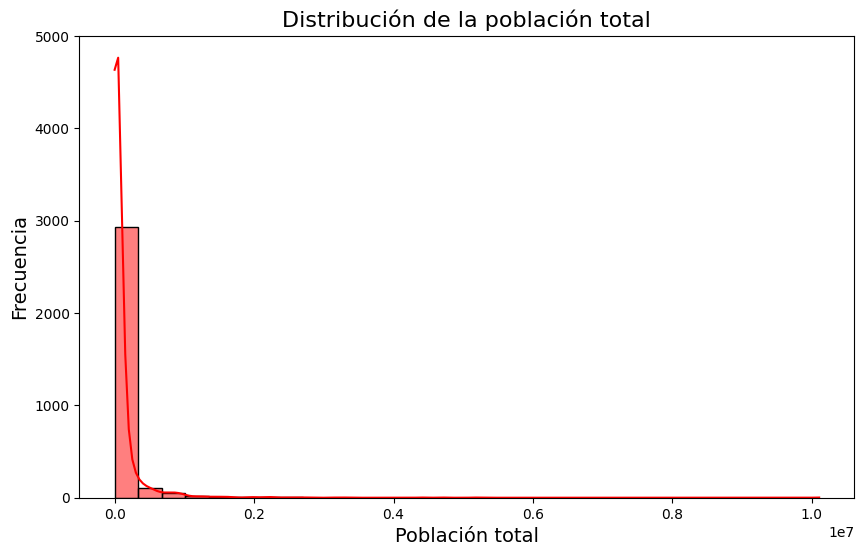

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOT_POP'], kde=True, bins=30, color='red')
plt.title('Distribución de la población total', fontsize=16)
plt.xlabel('Población total', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

La mayoría de las regiones tienen una población total relativamente baja, con algunas zonas que representan valores extremadamente altos, seguramente ciudades (núcleos de población)

Hagamos una matriz de correlación para tener una visión mas clara de la relación entre los diferentes grupos de edad: 


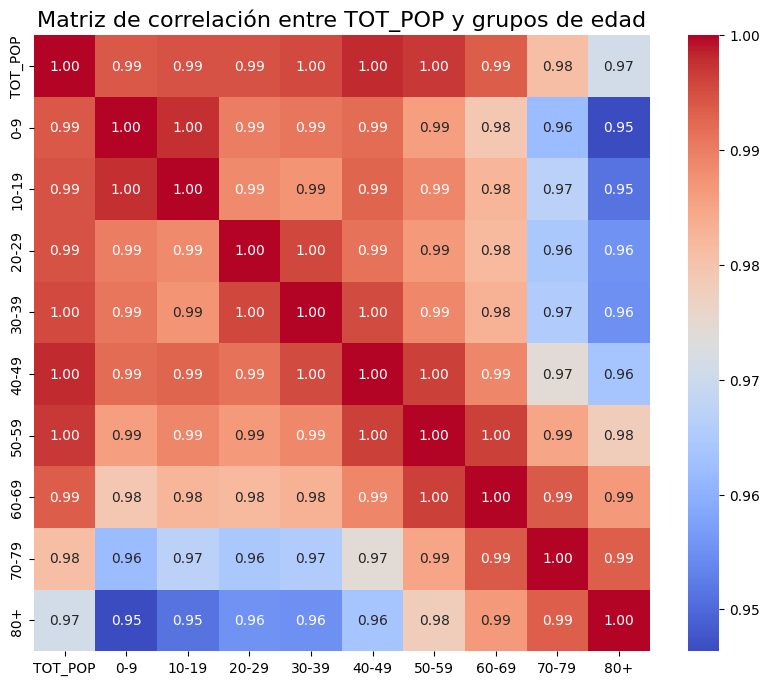

In [42]:
col_edad = ['TOT_POP', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Calcular la matriz de correlación
correlation_matrix = df[col_edad].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación entre TOT_POP y grupos de edad', fontsize=16)
plt.show()

Viendo los datos, tengo la sensación de que ha sido un ejercicio tonto, dado que el principal foco del estudio debería ser la correlación entre la demografía y los servicios de salud. 

Por lo tanto, como primera idea, al igual que en la práctica anterior, siempre es mejor tener la información lo mejor estructurada posible y el campo de 10-19 o 0-9 nos aporta mayor información que el campo TOT_POP, que es susceptible de eliminarlo.

Revisando el Dataframe ( y leyendo acerca del proceso de EDA en este tipo de estudios) podemos determinar que disponemos datos que abarcan áreas como : 

- Población
- Factores socioeconómicos : Media de ingresos en hogares, tasa de pobreza, desempleo
- Salud: Con factores de prevalencia para enfermedades cardíacas, obesidad y diabetes
- Regiones y densidad: Zonas urbanas y población por encima de los 60 años



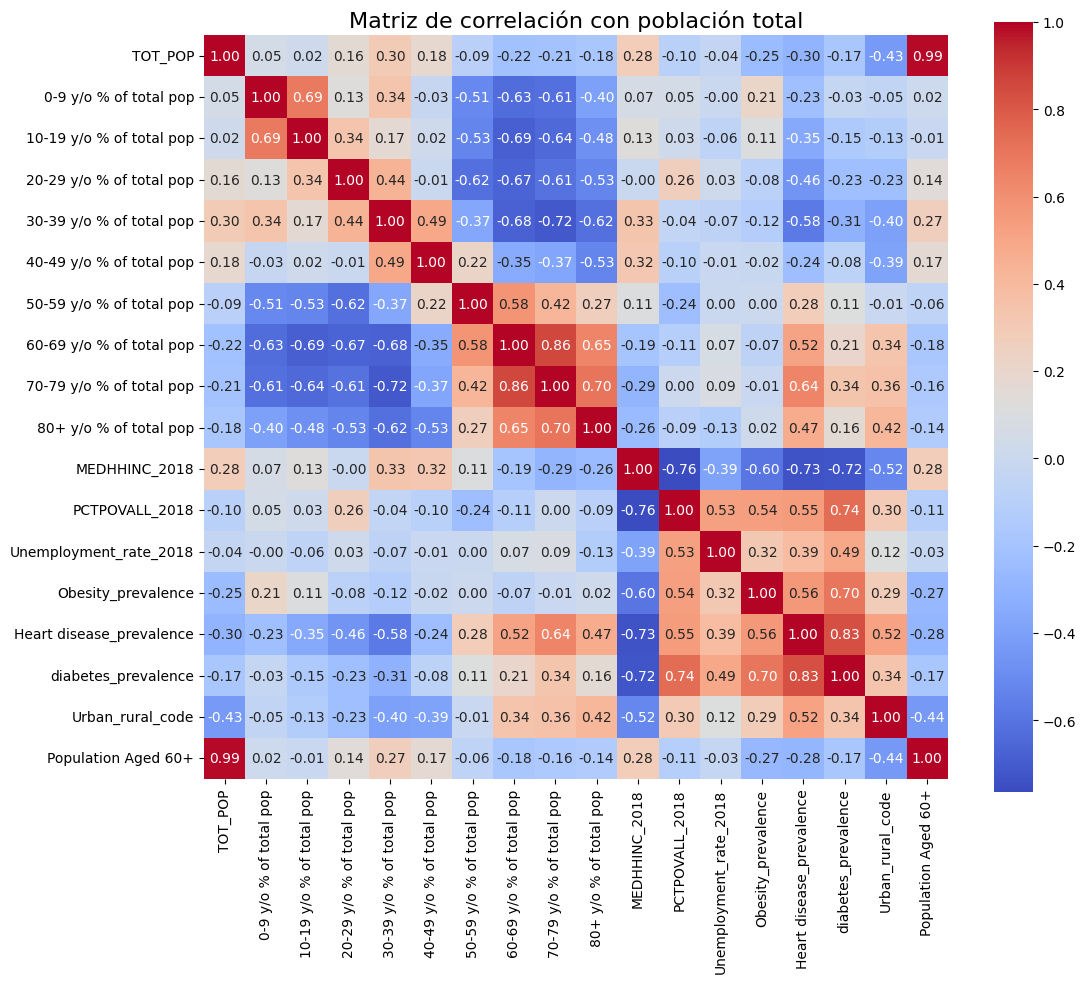

In [43]:
col_estudio = [
    'TOT_POP',
    '0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop',
    '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop',
    '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop',
    'MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code', 'Population Aged 60+'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población total', fontsize=16)
plt.show()


Sinceramente, a mi gusto, es muy confuso estudiar tanto la población total como los grupos de edad de manera conjunta. 

Lo ideal sería estudiar como cada grupo de población se relaciona con dichos factores, a pesar de que de manera evidente, los indicadores mas altos respecto a la salud estarían en la gente vieja, y no habrían datos de pobreza sobre niños, o la tasa de desempleo mostraría valores muy altos (son estudiantes)

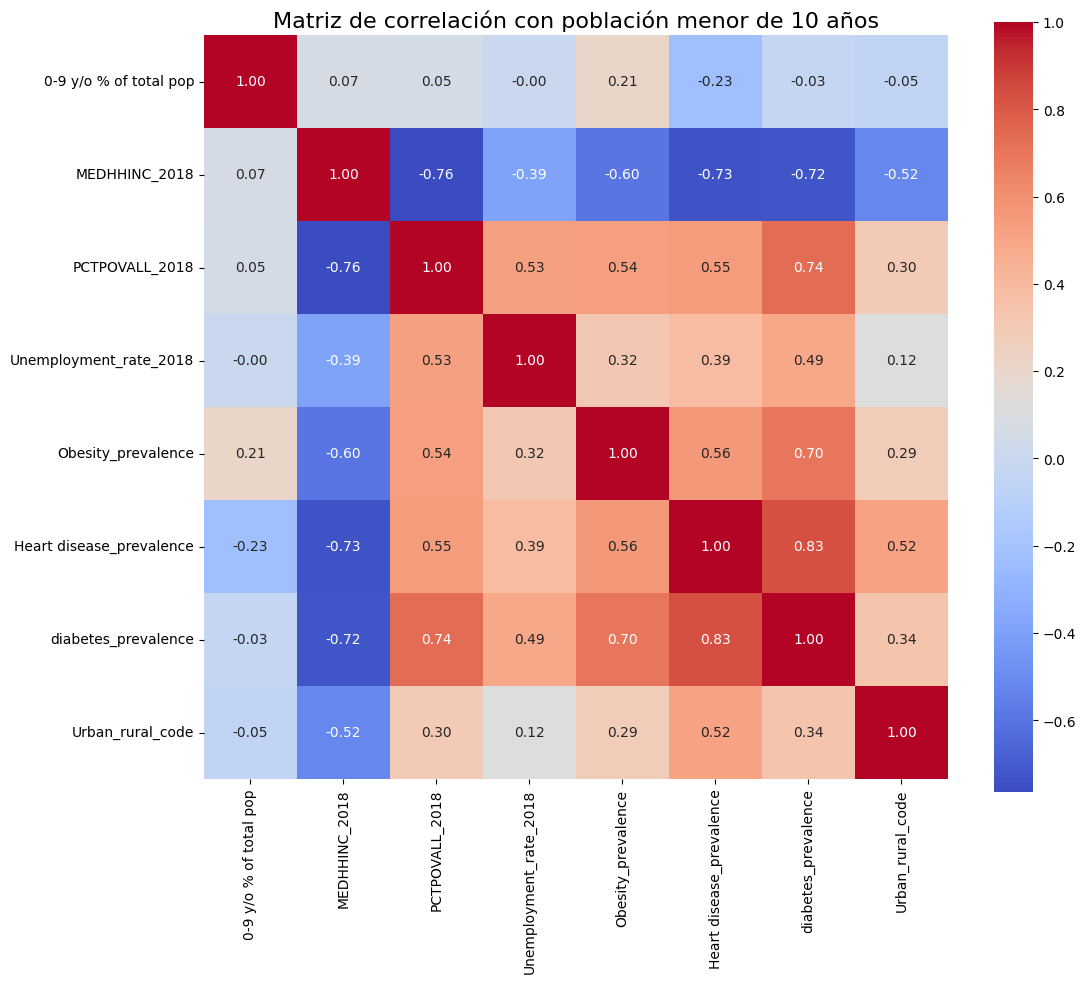

In [44]:
col_estudio = [
    
    '0-9 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población menor de 10 años', fontsize=16)
plt.show()

Como es evidente, hay una correlacion negativa en los campos de pobreza, desempleo, diabetes, afecciones de corazón y obesidad.

Con el fin de evitar comentar lo mismo una y otra vez por grupos de edad, podemos entender que existen relaciones intrínsecas como el income de una casa y el nivel de pobreza de la misma

La media del ingreso de la casa tiene una correlacion negativa con casi todo el resto de variables propuestas. 

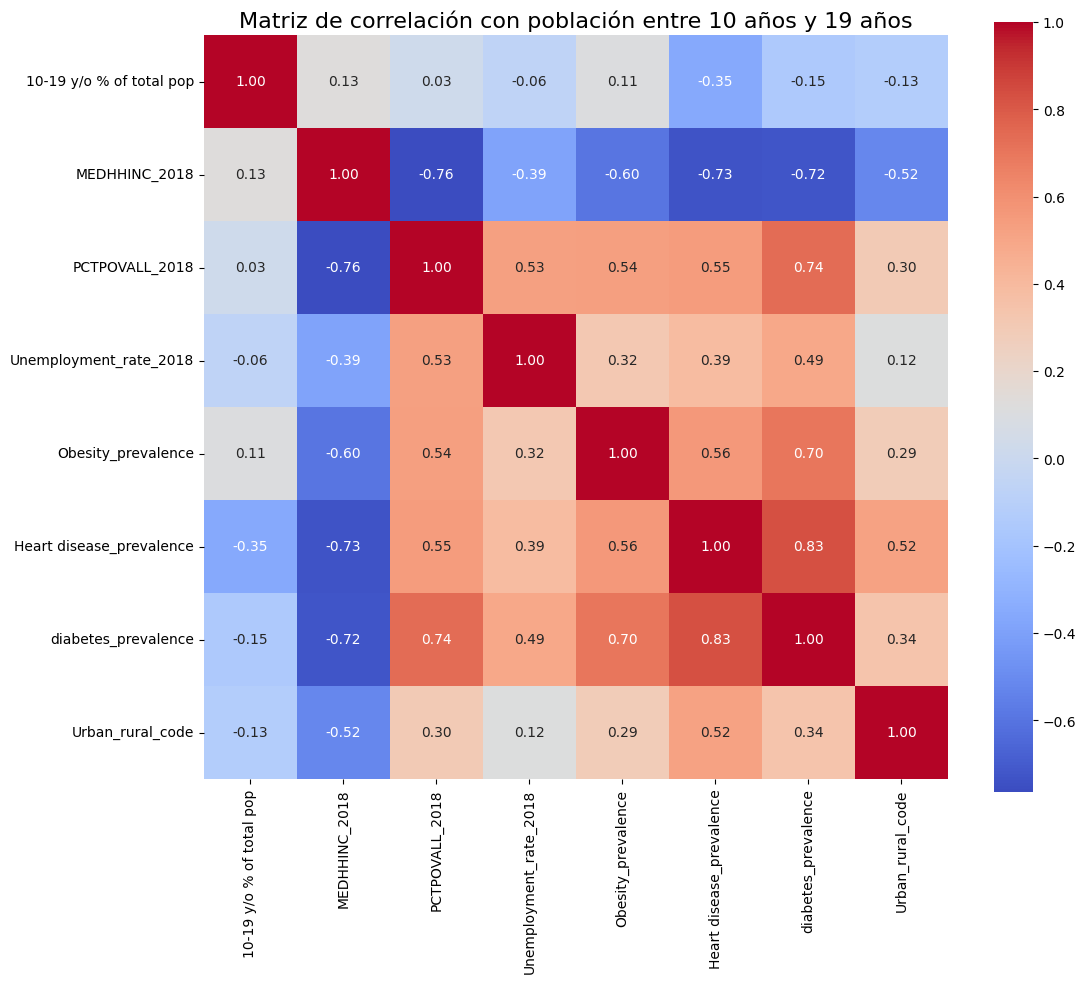

In [45]:
col_estudio = [
    
    '10-19 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 10 años y 19 años', fontsize=16)
plt.show()

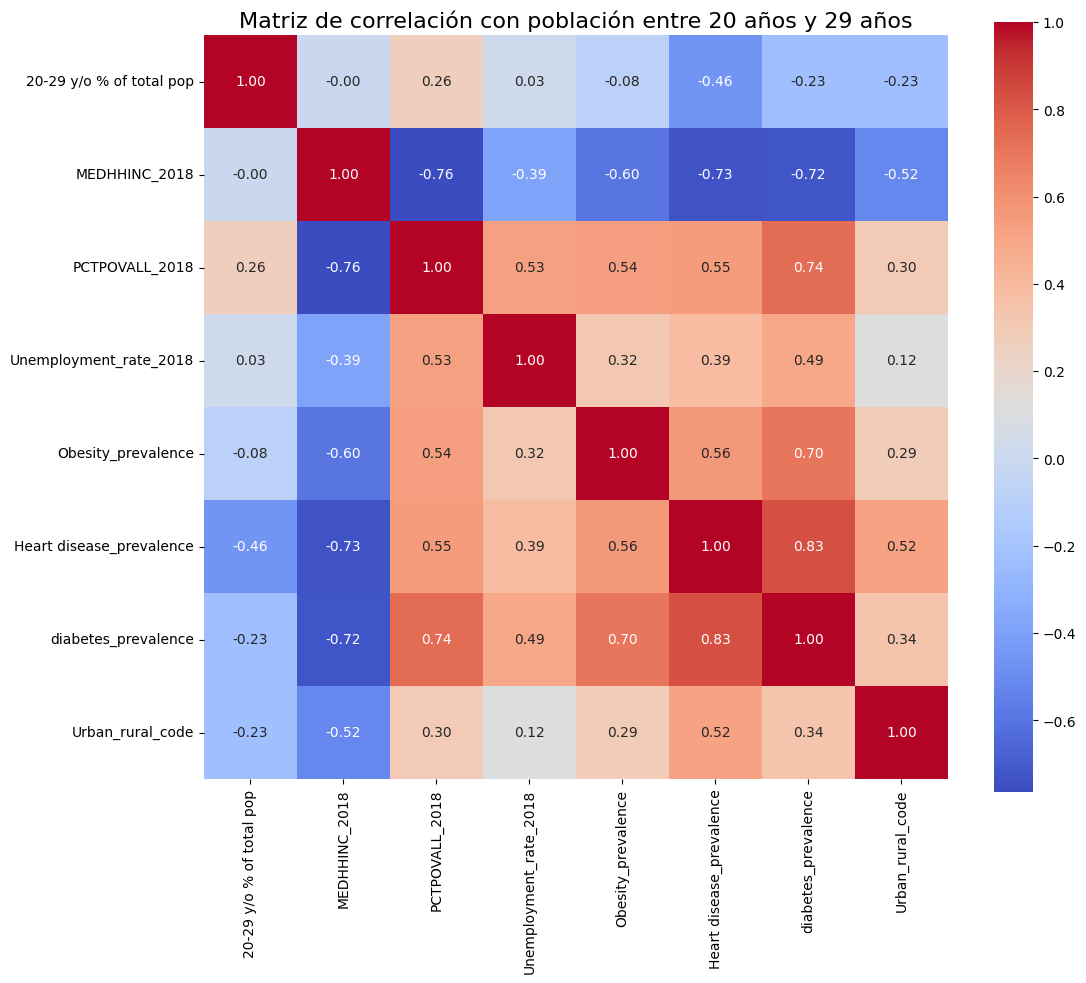

In [46]:
col_estudio = [
    
    '20-29 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 20 años y 29 años', fontsize=16)
plt.show()

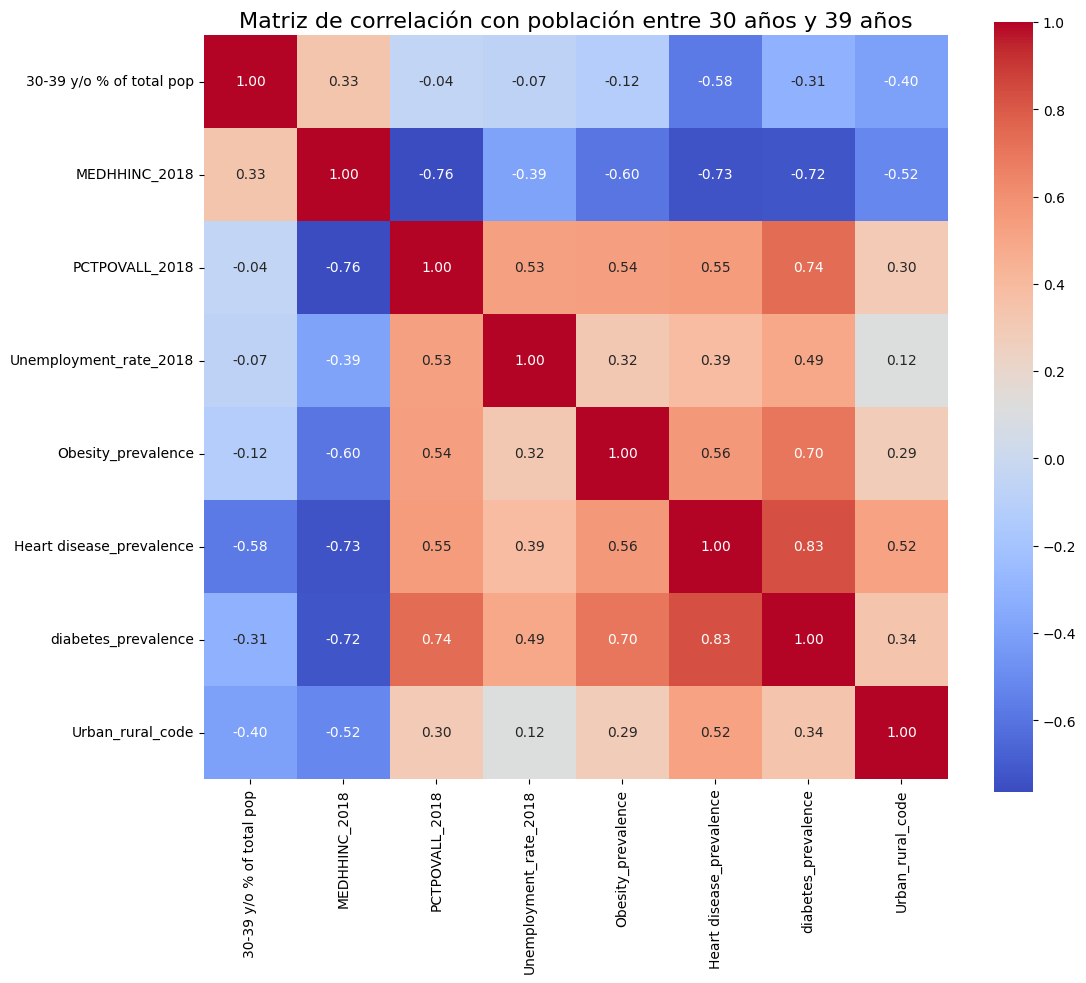

In [47]:
col_estudio = [
    
    '30-39 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 30 años y 39 años', fontsize=16)
plt.show()

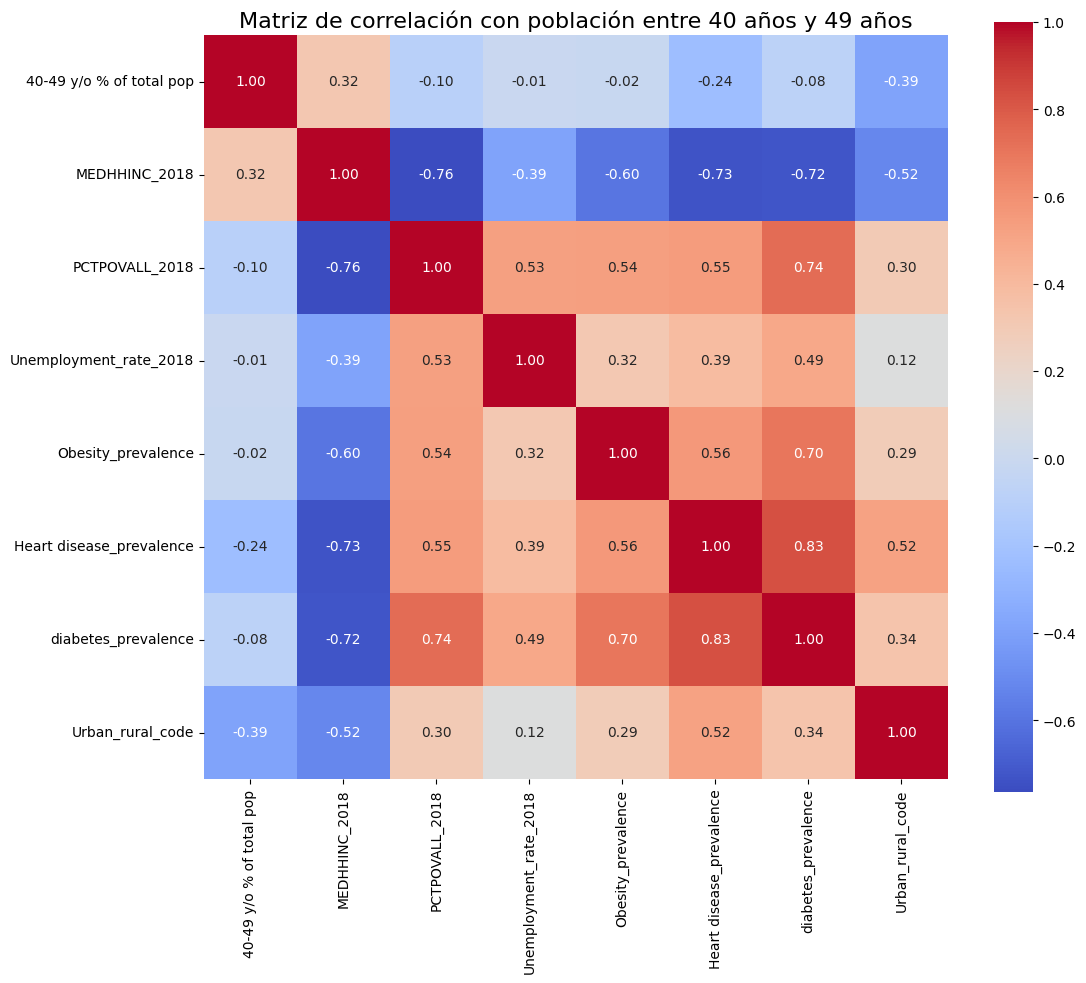

In [48]:
col_estudio = [
    
    '40-49 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 40 años y 49 años', fontsize=16)
plt.show()

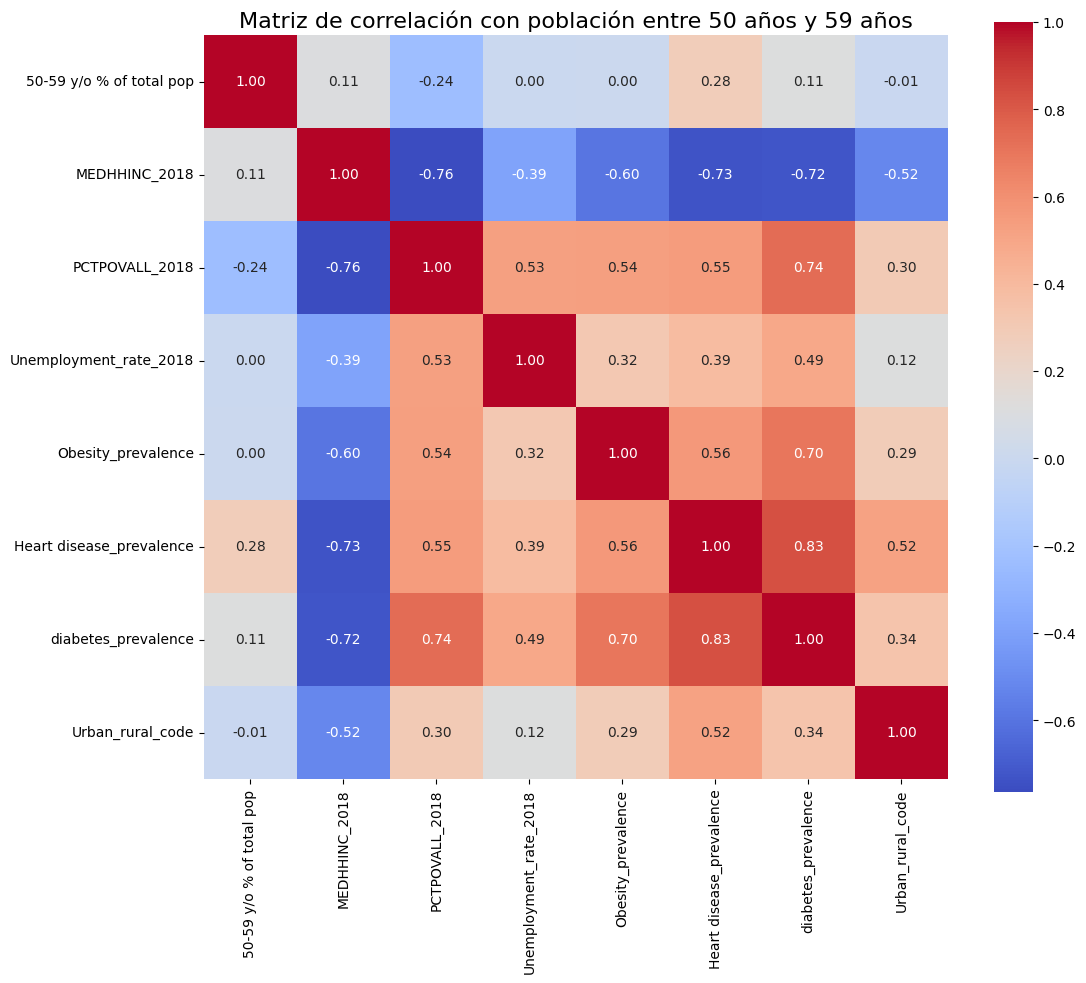

In [49]:
col_estudio = [
    
    '50-59 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 50 años y 59 años', fontsize=16)
plt.show()

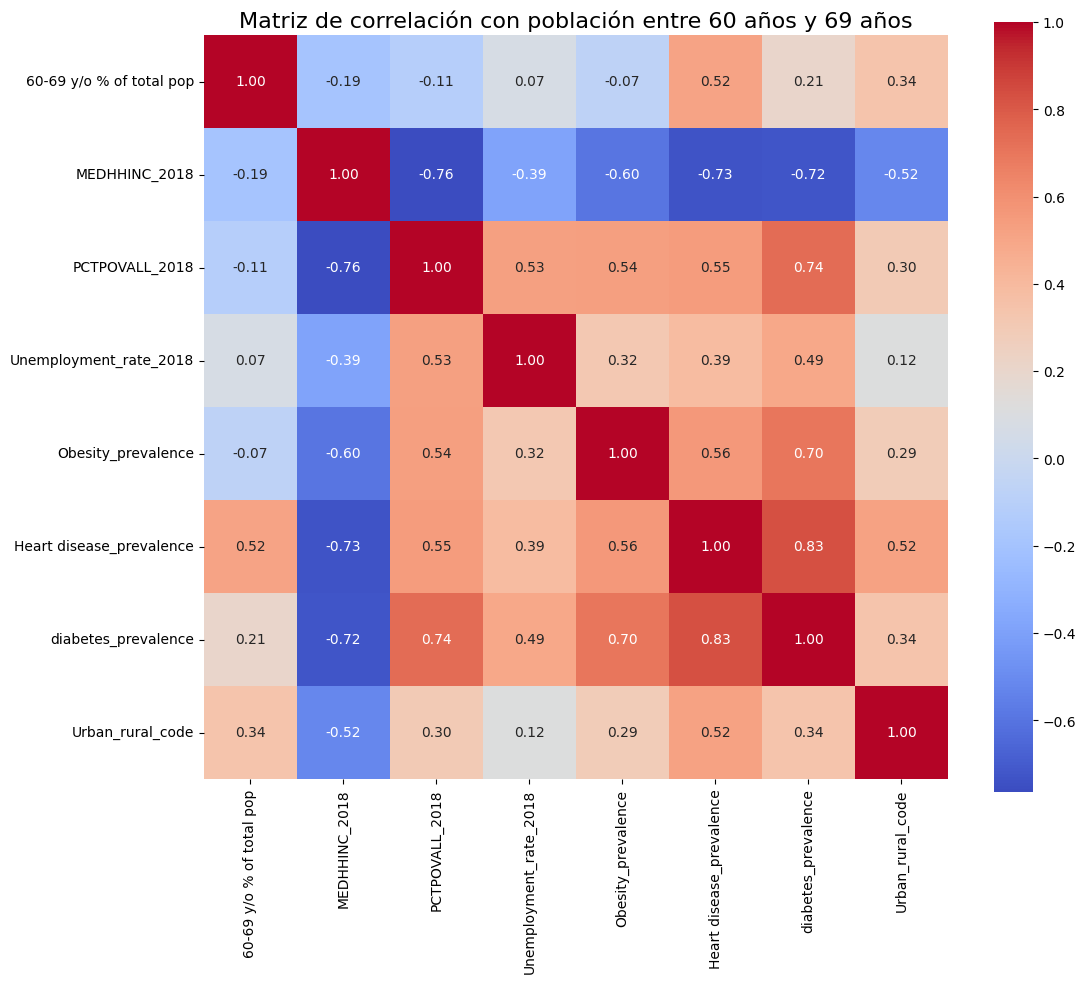

In [50]:
col_estudio = [
    
    '60-69 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 60 años y 69 años', fontsize=16)
plt.show()

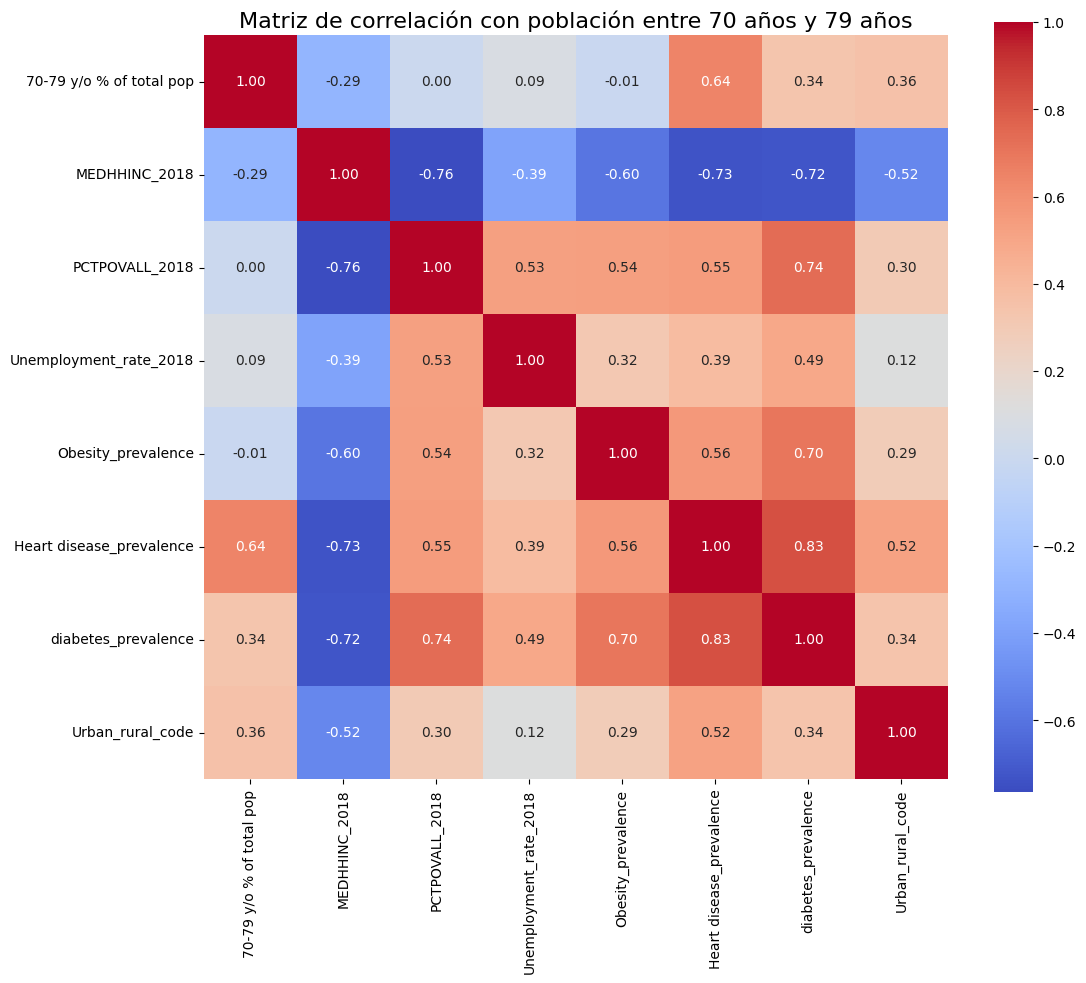

In [51]:
col_estudio = [
    
    '70-79 y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población entre 70 años y 79 años', fontsize=16)
plt.show()

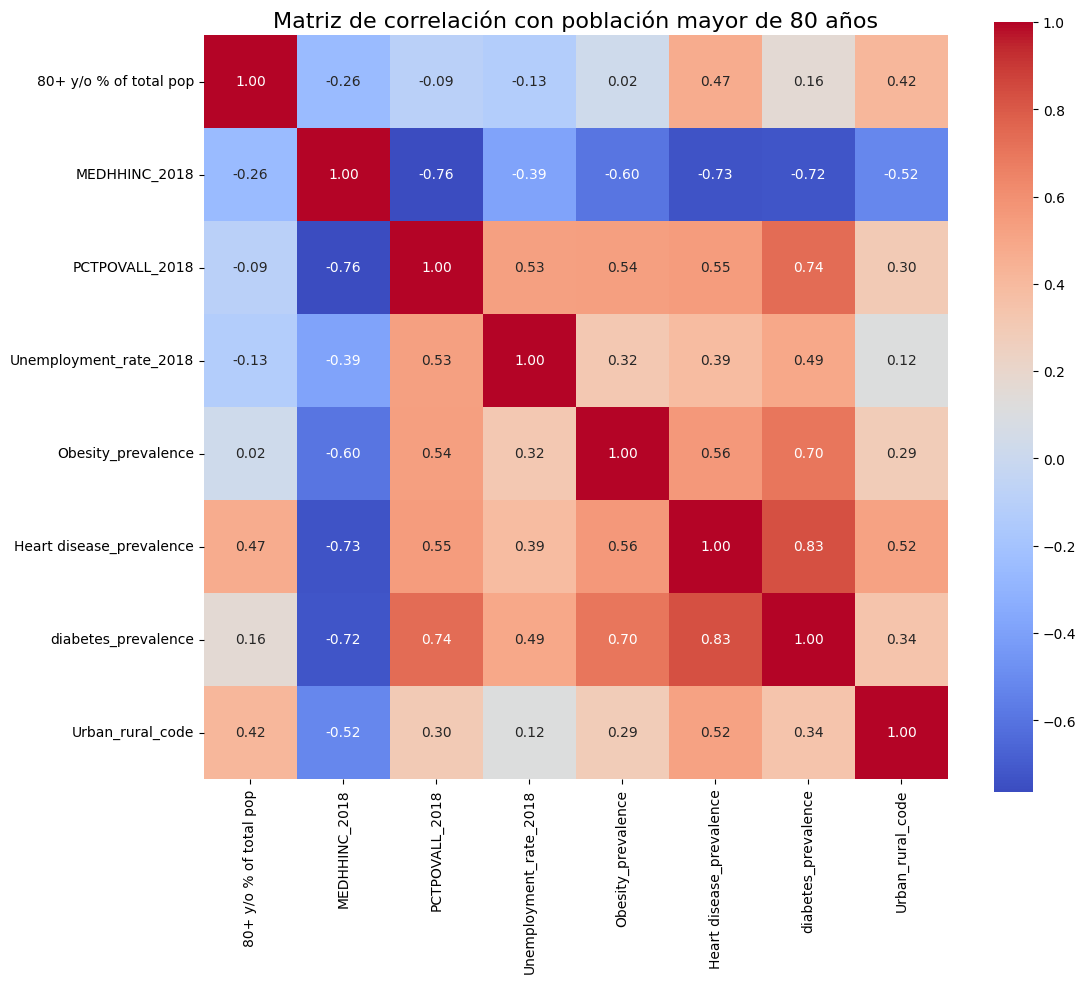

In [52]:
col_estudio = [
    
    '80+ y/o % of total pop','MEDHHINC_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018',
    'Obesity_prevalence', 'Heart disease_prevalence', 'diabetes_prevalence',
    'Urban_rural_code'
]

disp_col = [col for col in col_estudio if col in df.columns]
correlation_matrix = df[disp_col].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Matriz de correlación con población mayor de 80 años', fontsize=16)
plt.show()

In [ ]:
correlaciones = df.corr()['PCTPOVALL_2018']
correlaciones_interes = correlaciones[col_estudio]